In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [2]:
df_esr=pd.read_csv('filtered_data.csv')

In [3]:
df_esr.head()

,st,adjinc,pwgtp,agep,cit,cow,schl,sex,wagp,dis,esr,hisp,occp,rac1p,sciengp,year,Income_adj
0,42,1184371,7,21,1,1.0,21,2,6000,2,3,1,1920.0,1,1.0,2018,6817.760096
1,42,1184371,1,20,1,2.0,19,2,7200,2,6,1,1650.0,1,NaN,2018,8181.312115
2,42,1184371,15,40,1,2.0,24,1,0,2,6,1,1650.0,9,2.0,2018,0.000000
3,42,1184371,16,40,1,2.0,24,1,0,2,6,1,1650.0,9,2.0,2018,0.000000
4,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367


In [99]:
df_esr.shape

(25347, 17)

In [4]:
df = df_esr.loc[df_esr['esr'].isin([1, 2])]
df.head()

,st,adjinc,pwgtp,agep,cit,cow,schl,sex,wagp,dis,esr,hisp,occp,rac1p,sciengp,year,Income_adj
4,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
5,42,1184371,21,55,1,1.0,23,1,100000,2,1,1,1610.0,1,1.0,2018,113629.334934
6,42,1184371,10,31,1,1.0,21,1,95000,2,1,1,1720.0,1,1.0,2018,107947.868188
7,42,1184371,6,48,1,1.0,16,2,52000,2,1,1,1920.0,1,NaN,2018,59087.254166
8,42,1184371,4,40,1,4.0,16,1,38600,2,1,1,1910.0,1,NaN,2018,43860.923285


In [100]:
df.shape

(22068, 17)

In [5]:
mean_income_1 = df['Income_adj'].mean()

print("The mean income is:", mean_income_1)

The mean income is: 89206.20710759329


In [6]:
mean_income_by_gender = df.groupby('sex')['Income_adj'].mean()

print("Mean income by gender:")
print(mean_income_by_gender)

Mean income by gender:
sex
1    95466.568440
2    82479.761344
Name: Income_adj, dtype: float64


In [7]:
age_counts = df['agep'].value_counts()

In [8]:
age_counts

31    776
30    715
29    688
32    682
27    667
35    652
36    639
33    625
34    619
28    618
37    573
26    570
38    557
25    554
39    530
40    491
24    485
48    472
43    471
57    459
42    452
44    449
41    446
54    433
45    431
50    427
49    424
46    424
59    421
56    415
53    404
55    402
47    401
52    396
58    388
23    382
51    380
60    373
61    359
62    344
63    313
64    272
65    260
22    251
66    211
67    183
68    139
70    104
69    101
21     95
20     78
19     37
18     30
Name: agep, dtype: int64

In [9]:
filtered_df = df.loc[df.index.repeat(df['pwgtp'])]

filtered_df = filtered_df.reset_index(drop=True)

filtered_df.head(10)

,st,adjinc,pwgtp,agep,cit,cow,schl,sex,wagp,dis,esr,hisp,occp,rac1p,sciengp,year,Income_adj
0,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
1,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
2,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
3,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
4,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
5,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
6,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
7,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
8,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367
9,42,1184371,27,49,5,1.0,22,2,127000,2,1,1,1720.0,6,1.0,2018,144309.255367


In [101]:
filtered_df.shape

(453740, 17)

In [10]:
filtered_df = filtered_df.drop(columns=['pwgtp'])
filtered_df = filtered_df.drop(columns=['wagp'])
filtered_df = filtered_df.drop(columns=['adjinc'])

In [11]:
state_dict = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA',
    '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN',
    '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME',
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
    '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH',
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI',
    '56': 'WY', '72': 'PR'
}

race_dict = {
    '1': 'White alone',
    '2': 'Black or African American alone',
    '3': 'American Indian alone',
    '4': 'Alaska Native alone',
    '5': 'American Indian and Alaska Native tribes',
    '6': 'Asian alone',
    '7': 'Native Hawaiian and Other Pacific Islander alone',
    '8': 'Some Other Race alone',
    '9': 'Two or More Races'
}

educational_attainment_dict = {
    '01': 'No schooling completed',
    '02': 'Nursery school, preschool',
    '03': 'Kindergarten',
    '04': 'Grade 1',
    '05': 'Grade 2',
    '06': 'Grade 3',
    '07': 'Grade 4',
    '08': 'Grade 5',
    '09': 'Grade 6',
    '10': 'Grade 7',
    '11': 'Grade 8',
    '12': 'Grade 9',
    '13': 'Grade 10',
    '14': 'Grade 11',
    '15': '12th grade – no diploma',
    '16': 'Regular high school diploma',
    '17': 'GED or alternative credential',
    '18': 'Some college, but less than 1 year',
    '19': '1 or more years of college credit, no degree',
    '20': 'Associate’s degree',
    '21': 'Bachelor’s degree',
    '22': 'Master’s degree',
    '23': 'Professional degree beyond a bachelor’s degree',
    '24': 'Doctorate degree'
}

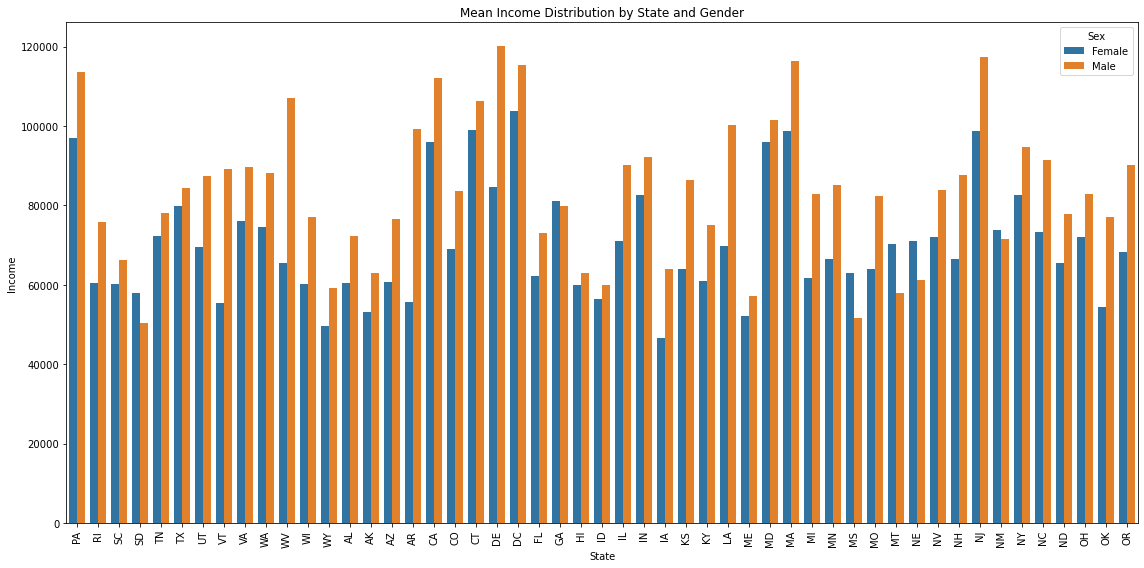

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and it has columns 'sex' and 'state_name' and 'Income_adj'
filtered_df['state_name'] = filtered_df['st'].apply(lambda x: state_dict.get(str(x).zfill(2), 'Unknown'))
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})  # This maps the sex column to labels

plt.figure(figsize=(16, 8))
sns.barplot(data=filtered_df, x='state_name', y='Income_adj', hue='sex_label', ci=None)  # Using 'sex_label' for hue
plt.title('Mean Income Distribution by State and Gender')
plt.xlabel('State')
plt.ylabel('Income')
plt.legend(title='Sex', loc='upper right')  # Corrected legend title
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


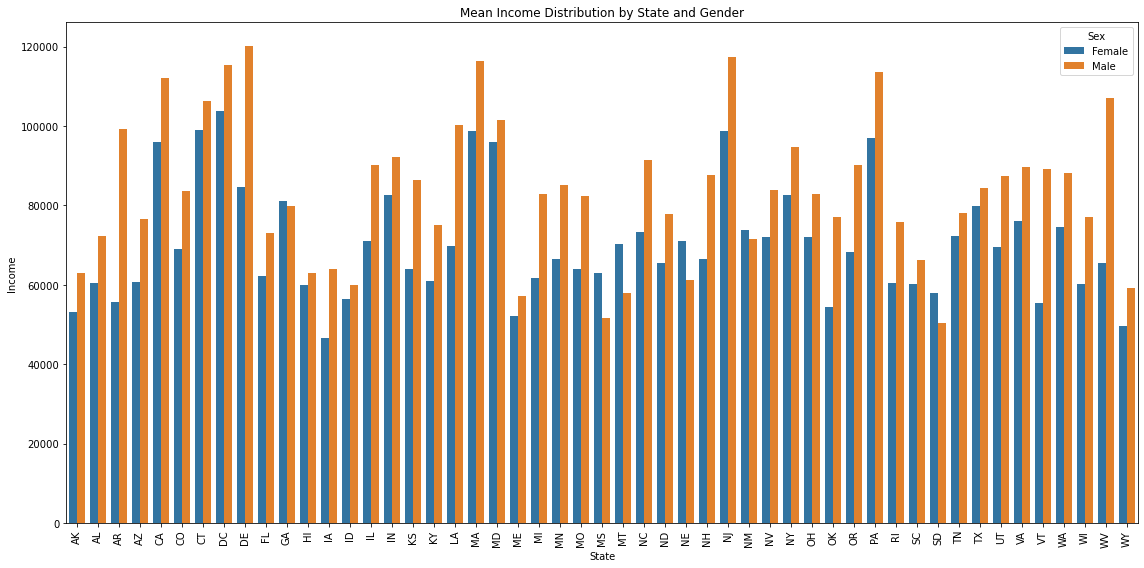

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and it has columns 'sex' and 'state_name' and 'Income_adj'
# Sort your DataFrame by 'state_name' to ensure the bars are in alphabetical order
filtered_df['state_name'] = filtered_df['st'].apply(lambda x: state_dict.get(str(x).zfill(2), 'Unknown'))
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})
filtered_df = filtered_df.sort_values('state_name')  # Sorting by state name

plt.figure(figsize=(16, 8))
sns.barplot(data=filtered_df, x='state_name', y='Income_adj', hue='sex_label', ci=None)
plt.title('Mean Income Distribution by State and Gender')
plt.xlabel('State')
plt.ylabel('Income')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


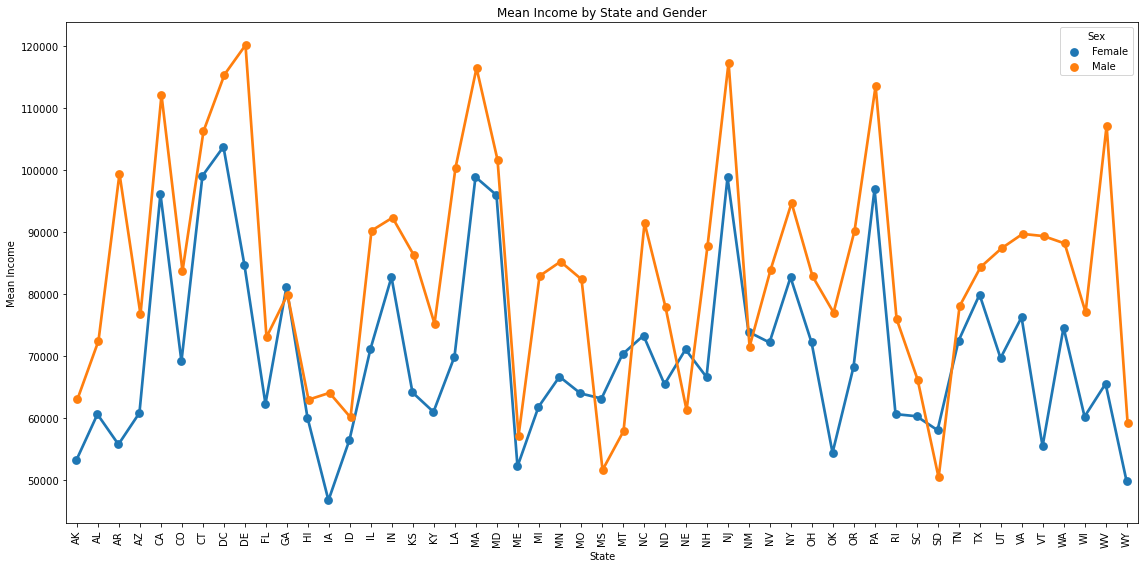

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and it has columns 'sex', 'state_name' and 'Income_adj'
# Sort your DataFrame by 'state_name' to ensure the lines are plotted in alphabetical order
filtered_df['state_name'] = filtered_df['st'].apply(lambda x: state_dict.get(str(x).zfill(2), 'Unknown'))
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})
filtered_df = filtered_df.sort_values('state_name')  # Sorting by state name

plt.figure(figsize=(16, 8))
sns.pointplot(data=filtered_df, x='state_name', y='Income_adj', hue='sex_label', ci=None, estimator=np.mean, dodge=True)
plt.title('Mean Income by State and Gender')
plt.xlabel('State')
plt.ylabel('Mean Income')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [15]:
mean_incomes = filtered_df.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()

In [16]:
mean_incomes.tail(60)

,state_name,sex_label,Income_adj
42,ME,Female,52141.732458
43,ME,Male,57072.548557
44,MI,Female,61750.056731
45,MI,Male,82866.509033
46,MN,Female,66628.394232
47,MN,Male,85186.219679
48,MO,Female,63926.125319
49,MO,Male,82326.382075
50,MS,Female,63099.357686
51,MS,Male,51572.847407


In [17]:
occupation_codes = [1910, 1920, 1720, 1650, 1610]

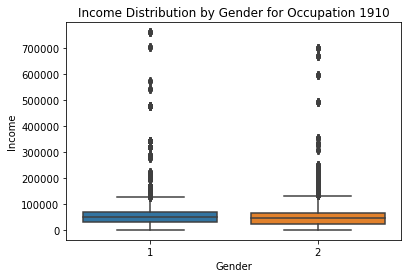

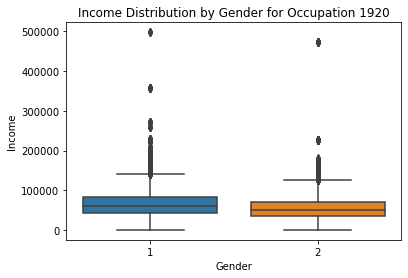

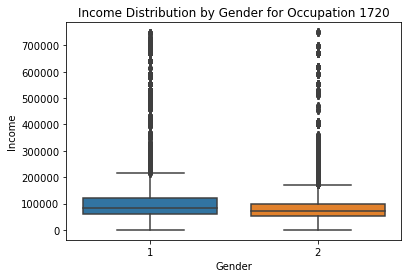

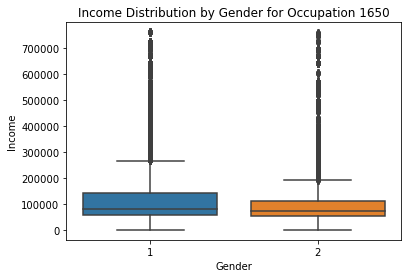

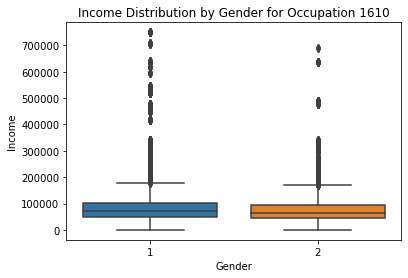

In [18]:
for occupation_code in occupation_codes:
    sns.boxplot(data=filtered_df[filtered_df['occp'] == occupation_code], x='sex', y='Income_adj')
    plt.title(f'Income Distribution by Gender for Occupation {occupation_code}')
    plt.xlabel('Gender')
    plt.ylabel('Income')
    plt.show()

In [19]:
import pandas as pd

# Example dataframe, replace this with your actual dataframe
# filtered_df = pd.read_csv('your_dataframe.csv')

# Define the occupation codes
occupation_codes = [1910, 1920, 1720, 1650, 1610]

# Empty dictionary to store mean incomes
mean_incomes_by_occupation = {}

# Calculate mean income by gender for each occupation code
for code in occupation_codes:
    # Filter the dataframe for the current occupation code
    df_filtered = filtered_df[filtered_df['occp'] == code]
    # Calculate the mean income for each gender
    mean_incomes = df_filtered.groupby('sex')['Income_adj'].mean()
    # Store the mean incomes in the dictionary
    mean_incomes_by_occupation[code] = mean_incomes

# Convert the dictionary to a dataframe for display as a table
mean_incomes_table = pd.DataFrame(mean_incomes_by_occupation)

mean_incomes_table


,1910,1920,1720,1650,1610
sex,,,,,
1,59644.062408,63556.779696,100528.430731,116911.012460,83970.156139
2,54516.062664,56620.154336,84445.379623,92034.802185,72882.348040


In [20]:
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race = filtered_df.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race.reset_index(inplace=True)
mean_income_by_sex_and_race

,sex_label,rac1p,mean_income
0,Female,1,78455.444271
1,Female,2,73191.526572
2,Female,3,65452.318503
3,Female,4,115818.736818
4,Female,5,57867.595427
5,Female,6,93487.731250
6,Female,7,82921.999620
7,Female,8,56895.570032
8,Female,9,75911.552210
9,Male,1,93789.749267


In [21]:
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex = filtered_df.groupby(['sex_label', 'schl']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex.reset_index(inplace=True)
mean_income_by_edu_and_sex

,sex_label,schl,mean_income
0,Female,1,63736.937390
1,Female,2,94586.542064
2,Female,6,18000.000000
3,Female,9,37977.561669
4,Female,10,40660.567936
5,Female,11,52393.854379
6,Female,12,31962.457866
7,Female,13,52850.168331
8,Female,14,44648.791235
9,Female,15,57814.727244


In [22]:
filtered_df_1610 = filtered_df[filtered_df['occp'] == 1610]

mean_incomes_1610 = filtered_df_1610.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()
mean_incomes_1610.tail(60)


,state_name,sex_label,Income_adj
42,ME,Female,47786.295819
43,ME,Male,60234.867376
44,MI,Female,53273.689792
45,MI,Male,56381.156911
46,MN,Female,60589.517025
47,MN,Male,79396.077466
48,MO,Female,44266.518166
49,MO,Male,67637.897108
50,MS,Female,92864.166417
51,MS,Male,65616.642434


In [23]:
filtered_df_1650 = filtered_df[filtered_df['occp'] == 1650]

mean_incomes_1650 = filtered_df_1650.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()
mean_incomes_1650.head(42)

,state_name,sex_label,Income_adj
0,AK,Female,88239.055956
1,AK,Male,61020.347231
2,AL,Female,55871.215606
3,AL,Male,75711.425870
4,AR,Female,76860.712696
5,AR,Male,124809.500273
6,AZ,Female,84463.047732
7,AZ,Male,113754.733666
8,CA,Female,112662.315832
9,CA,Male,135138.887959


In [24]:
filtered_df_1720 = filtered_df[filtered_df['occp'] == 1720]

mean_incomes_1720 = filtered_df_1720.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()
mean_incomes_1720.tail(60)

,state_name,sex_label,Income_adj
39,MD,Female,111836.980551
40,MD,Male,110460.161901
41,ME,Female,48511.724811
42,ME,Male,48896.274807
43,MI,Female,70762.705289
44,MI,Male,100014.066581
45,MN,Female,72387.499288
46,MN,Male,97054.094373
47,MO,Female,70910.744451
48,MO,Male,93150.429142


In [25]:
filtered_df_1920 = filtered_df[filtered_df['occp'] == 1920]

mean_incomes_1920 = filtered_df_1920.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()
mean_incomes_1920.tail(47)

,state_name,sex_label,Income_adj
50,NC,Female,50283.812748
51,NC,Male,57049.679132
52,ND,Female,120321.025758
53,ND,Male,80000.000000
54,NE,Female,49615.894222
55,NE,Male,56527.860880
56,NH,Female,54183.685704
57,NH,Male,41389.294226
58,NJ,Female,67016.628936
59,NJ,Male,58738.735622


In [26]:
filtered_df_1910 = filtered_df[filtered_df['occp'] == 1910]

mean_incomes_1910 = filtered_df_1910.groupby(['state_name', 'sex_label'])['Income_adj'].mean().reset_index()
mean_incomes_1910.tail(48)

,state_name,sex_label,Income_adj
50,MT,Female,62622.191797
51,MT,Male,38947.399673
52,NC,Female,53234.669748
53,NC,Male,81892.679539
54,ND,Female,44511.313912
55,ND,Male,83767.576196
56,NE,Female,63390.485102
57,NE,Male,45224.737981
58,NH,Female,91195.923140
59,NH,Male,0.000000


In [27]:
mean_incomes_occp = filtered_df.groupby(['state_name', 'sex_label', 'occp'])['Income_adj'].mean().reset_index()

In [28]:
mean_incomes_occp

,state_name,sex_label,occp,Income_adj
0,AK,Female,1610.0,77943.141618
1,AK,Female,1650.0,88239.055956
2,AK,Female,1720.0,59162.246491
3,AK,Female,1910.0,11825.057523
4,AK,Male,1610.0,71437.950044
...,...,...,...,...
493,WY,Male,1610.0,61746.791278
494,WY,Male,1650.0,101139.239631
495,WY,Male,1720.0,17501.240110
496,WY,Male,1910.0,23368.439804


In [29]:
filtered_df_1610['sex_label'] = filtered_df_1610['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex_1610 = filtered_df_1610.groupby(['sex_label', 'schl', 'occp']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex_1610.reset_index(inplace=True)
mean_income_by_edu_and_sex_1610

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/1055220005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1610['sex_label'] = filtered_df_1610['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,schl,occp,mean_income
0,Female,21,1610.0,60530.842884
1,Female,22,1610.0,75929.500406
2,Female,23,1610.0,90882.197235
3,Female,24,1610.0,103820.189948
4,Male,21,1610.0,71331.825438
5,Male,22,1610.0,80207.035049
6,Male,23,1610.0,101043.334115
7,Male,24,1610.0,116800.478797


In [30]:
filtered_df_1720['sex_label'] = filtered_df_1720['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex_1720 = filtered_df_1720.groupby(['sex_label', 'schl', 'occp']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex_1720.reset_index(inplace=True)
mean_income_by_edu_and_sex_1720

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/1340650652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1720['sex_label'] = filtered_df_1720['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,schl,occp,mean_income
0,Female,1,1720.0,65700.008548
1,Female,10,1720.0,65000.000000
2,Female,11,1720.0,69000.000000
3,Female,12,1720.0,74764.916063
4,Female,13,1720.0,56000.000000
5,Female,14,1720.0,17647.058824
6,Female,15,1720.0,53629.629630
7,Female,16,1720.0,83079.171752
8,Female,17,1720.0,73064.177995
9,Female,18,1720.0,78023.299220


In [31]:
filtered_df_1920['sex_label'] = filtered_df_1920['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex_1920 = filtered_df_1920.groupby(['sex_label', 'schl', 'occp']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex_1920.reset_index(inplace=True)
mean_income_by_edu_and_sex_1920

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/3784029726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1920['sex_label'] = filtered_df_1920['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,schl,occp,mean_income
0,Female,1,1920.0,48868.652692
1,Female,6,1920.0,18000.000000
2,Female,9,1920.0,69950.713991
3,Female,10,1920.0,27800.000000
4,Female,11,1920.0,39167.123491
5,Female,12,1920.0,28345.227339
6,Female,13,1920.0,43980.981261
7,Female,14,1920.0,27010.040300
8,Female,15,1920.0,48602.309100
9,Female,16,1920.0,48807.386203


In [32]:
filtered_df_1910['sex_label'] = filtered_df_1910['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex_1910 = filtered_df_1910.groupby(['sex_label', 'schl', 'occp']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex_1910.reset_index(inplace=True)
mean_income_by_edu_and_sex_1910

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/748780934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1910['sex_label'] = filtered_df_1910['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,schl,occp,mean_income
0,Female,1,1910.0,57501.879283
1,Female,2,1910.0,94586.542064
2,Female,9,1910.0,8181.312115
3,Female,11,1910.0,62269.230769
4,Female,12,1910.0,19774.130191
5,Female,13,1910.0,79741.540788
6,Female,14,1910.0,61619.251555
7,Female,15,1910.0,50551.086697
8,Female,16,1910.0,42885.123474
9,Female,17,1910.0,40025.237572


In [33]:
filtered_df_1650['sex_label'] = filtered_df_1650['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex_1650 = filtered_df_1650.groupby(['sex_label', 'schl', 'occp']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex_1650.reset_index(inplace=True)
mean_income_by_edu_and_sex_1650

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/1570449153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1650['sex_label'] = filtered_df_1650['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,schl,occp,mean_income
0,Female,1,1650.0,90819.527664
1,Female,9,1650.0,55539.651932
2,Female,10,1650.0,48072.219025
3,Female,11,1650.0,54691.375344
4,Female,12,1650.0,71098.787948
5,Female,14,1650.0,68265.884671
6,Female,15,1650.0,78112.839396
7,Female,16,1650.0,90859.420330
8,Female,17,1650.0,72720.510362
9,Female,18,1650.0,69661.704490


In [34]:
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_edu_and_sex = filtered_df.groupby(['sex_label', 'schl']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_edu_and_sex.reset_index(inplace=True)
mean_income_by_edu_and_sex

,sex_label,schl,mean_income
0,Female,1,63736.937390
1,Female,2,94586.542064
2,Female,6,18000.000000
3,Female,9,37977.561669
4,Female,10,40660.567936
5,Female,11,52393.854379
6,Female,12,31962.457866
7,Female,13,52850.168331
8,Female,14,44648.791235
9,Female,15,57814.727244


In [35]:
filtered_df_1610['sex_label'] = filtered_df_1610['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race_1610 = filtered_df_1610.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race_1610.reset_index(inplace=True)
mean_income_by_sex_and_race_1610

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/3137855904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1610['sex_label'] = filtered_df_1610['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,rac1p,mean_income
0,Female,1,68558.063978
1,Female,2,76566.024950
2,Female,3,55022.093393
3,Female,4,97194.390882
4,Female,5,50894.474366
5,Female,6,93986.889896
6,Female,8,61278.299472
7,Female,9,79816.599897
8,Male,1,82354.220986
9,Male,2,70533.250622


In [36]:
filtered_df_1650['sex_label'] = filtered_df_1650['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race_1650 = filtered_df_1650.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race_1650.reset_index(inplace=True)
mean_income_by_sex_and_race_1650

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/1902914899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1650['sex_label'] = filtered_df_1650['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,rac1p,mean_income
0,Female,1,91373.888271
1,Female,2,85401.548998
2,Female,3,94253.909084
3,Female,4,119310.801681
4,Female,6,98670.466666
5,Female,7,90421.125395
6,Female,8,63463.708543
7,Female,9,88155.333903
8,Male,1,126434.711523
9,Male,2,85616.390649


In [37]:
filtered_df_1720['sex_label'] = filtered_df_1720['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race_1720 = filtered_df_1720.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race_1720.reset_index(inplace=True)
mean_income_by_sex_and_race_1720

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/1106708564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1720['sex_label'] = filtered_df_1720['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,rac1p,mean_income
0,Female,1,87173.640706
1,Female,2,73499.366620
2,Female,3,77895.781613
3,Female,5,64602.201654
4,Female,6,90269.462036
5,Female,8,55095.023472
6,Female,9,68356.887372
7,Male,1,102059.063299
8,Male,2,77920.492798
9,Male,3,70020.502617


In [38]:
filtered_df_1920['sex_label'] = filtered_df_1920['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race_1920 = filtered_df_1920.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race_1920.reset_index(inplace=True)
mean_income_by_sex_and_race_1920

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/2271527948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1920['sex_label'] = filtered_df_1920['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,rac1p,mean_income
0,Female,1,58035.928330
1,Female,2,52013.781449
2,Female,3,16254.371671
3,Female,5,15487.018327
4,Female,6,62152.330001
5,Female,8,44313.703742
6,Female,9,55657.091878
7,Male,1,65311.193877
8,Male,2,62801.452859
9,Male,3,66376.883115


In [39]:
filtered_df_1910['sex_label'] = filtered_df_1910['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race_1910 = filtered_df_1910.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race_1910.reset_index(inplace=True)
mean_income_by_sex_and_race_1910

/var/folders/9d/m5v85dj91mq7cwy61v3s0kcr0000gp/T/ipykernel_17171/2328529347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1910['sex_label'] = filtered_df_1910['sex'].replace({1: 'Male', 2: 'Female'})


,sex_label,rac1p,mean_income
0,Female,1,50233.328567
1,Female,2,65838.680246
2,Female,3,27363.049928
3,Female,5,38283.962741
4,Female,6,69235.553762
5,Female,7,67681.840785
6,Female,8,57216.141928
7,Female,9,45388.874213
8,Male,1,56356.324460
9,Male,2,70455.364504


In [40]:
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

mean_income_by_sex_and_race = filtered_df.groupby(['sex_label', 'rac1p']).agg(mean_income=('Income_adj', 'mean'))

mean_income_by_sex_and_race.reset_index(inplace=True)
mean_income_by_sex_and_race

,sex_label,rac1p,mean_income
0,Female,1,78455.444271
1,Female,2,73191.526572
2,Female,3,65452.318503
3,Female,4,115818.736818
4,Female,5,57867.595427
5,Female,6,93487.731250
6,Female,7,82921.999620
7,Female,8,56895.570032
8,Female,9,75911.552210
9,Male,1,93789.749267


In [41]:
# Import the necessary package
import pandas as pd

filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

age_bins = [18 ,19 ,20, 30, 40, 50, 60, 70, 80]
age_labels = ['18','19','20-30', '31-40', '41-50', '51-60', '61-70', '71-80']


filtered_df['age_group'] = pd.cut(filtered_df['agep'], bins=age_bins, labels=age_labels, right=False)

occupation_codes = [1910, 1920, 1720, 1650, 1610]

tables_by_occupation = {}

for occupation_code in occupation_codes:
    df_occupation = filtered_df[filtered_df['occp'] == occupation_code]
    
    stats_by_group = df_occupation.groupby(['age_group', 'sex_label']).agg(
        mean_income=('Income_adj', 'mean'),
        median_income=('Income_adj', 'median'),
        count=('Income_adj', 'count') 
    ).reset_index()

    tables_by_occupation[occupation_code] = stats_by_group

tables_by_occupation[1610]


,age_group,sex_label,mean_income,median_income,count
0,18,Female,NaN,NaN,0
1,18,Male,NaN,NaN,0
2,19,Female,NaN,NaN,0
3,19,Male,NaN,NaN,0
4,20-30,Female,46257.732979,45451.733974,12041
5,20-30,Male,46893.858930,42722.809179,9005
6,31-40,Female,71581.135117,65629.650413,14258
7,31-40,Male,72860.685770,64084.213768,13493
8,41-50,Female,85884.643227,76950.528261,8990
9,41-50,Male,100125.673159,85318.545537,11018


In [42]:
tables_by_occupation[1650] 

,age_group,sex_label,mean_income,median_income,count
0,18,Female,NaN,NaN,0
1,18,Male,NaN,NaN,0
2,19,Female,13200.000000,13200.000000,3
3,19,Male,NaN,NaN,0
4,20-30,Female,57722.443160,54000.000000,17576
5,20-30,Male,58590.385198,54000.000000,10492
6,31-40,Female,80061.090089,68992.536564,32705
7,31-40,Male,89619.668329,66766.970869,25630
8,41-50,Female,110241.788390,96126.320652,20162
9,41-50,Male,127799.048875,103913.613154,14439


In [43]:
tables_by_occupation[1720] 

,age_group,sex_label,mean_income,median_income,count
0,18,Female,NaN,NaN,0
1,18,Male,NaN,NaN,0
2,19,Female,NaN,NaN,0
3,19,Male,10680.702295,10680.702295,80
4,20-30,Female,55348.700102,52300.793847,11466
5,20-30,Male,55372.729801,55000.000000,12755
6,31-40,Female,77117.139031,69424.564916,12225
7,31-40,Male,87015.035907,77000.000000,17859
8,41-50,Female,99937.673502,85222.001201,7406
9,41-50,Male,122295.616681,103913.613154,12456


In [44]:
tables_by_occupation[1920] 

,age_group,sex_label,mean_income,median_income,count
0,18,Female,17504.172335,2781.957120,57
1,18,Male,9347.252435,3977.026723,200
2,19,Female,4983.525372,1281.684275,86
3,19,Male,12873.941753,3977.026723,313
4,20-30,Female,41077.152507,40906.560576,6580
5,20-30,Male,42496.511629,40000.000000,9708
6,31-40,Female,61411.674746,53000.000000,5526
7,31-40,Male,63359.435796,58743.862621,9105
8,41-50,Female,62114.587579,54000.000000,3840
9,41-50,Male,72014.061833,68177.600961,8204


In [45]:
tables_by_occupation[1910] 

,age_group,sex_label,mean_income,median_income,count
0,18,Female,2759.287787,1174.877252,65
1,18,Male,6785.120842,8902.262782,188
2,19,Female,4608.244659,3522.509383,82
3,19,Male,2776.982597,2776.982597,14
4,20-30,Female,38071.719474,35609.051130,6314
5,20-30,Male,37460.101436,30845.935694,5758
6,31-40,Female,56829.620284,43398.531065,3168
7,31-40,Male,71835.573740,63441.995400,3288
8,41-50,Female,72810.536827,51267.371015,2802
9,41-50,Male,95557.588244,66766.970869,2049


In [46]:
filtered_df['sex_label'] = filtered_df['sex'].replace({1: 'Male', 2: 'Female'})

age_bins = [18,19,20, 30, 40, 50, 60, 70, 80]
age_labels = ['18','19','20-30', '31-40', '41-50', '51-60', '61-70', '71-80']

filtered_df['age_group'] = pd.cut(filtered_df['agep'], bins=age_bins, labels=age_labels, right=False)

income_stats_by_age_sex = filtered_df.groupby(['age_group', 'sex_label']).agg(
    mean_income=('Income_adj', 'mean'),
    median_income=('Income_adj', 'median'),
    count=('Income_adj', 'count')
).reset_index()

income_stats_by_age_sex

,age_group,sex_label,mean_income,median_income,count
0,18,Female,9648.291224,2187.655014,122
1,18,Male,8105.807230,4451.131391,388
2,19,Female,4947.714878,3522.509383,171
3,19,Male,12095.522626,10680.702295,407
4,20-30,Female,50332.914378,49131.230556,53977
5,20-30,Male,49699.067202,48063.160326,47718
6,31-40,Female,75147.402142,66220.354227,67882
7,31-40,Male,81400.301089,66766.970869,69375
8,41-50,Female,96700.727560,83309.477899,43200
9,41-50,Male,109172.241758,89693.855565,48166


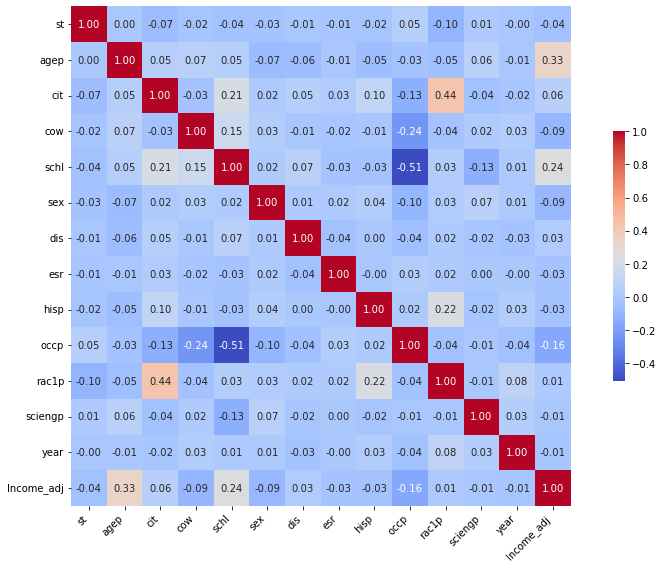

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = filtered_df.corr()

plt.figure(figsize=(12, 8))


sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  

plt.show()

In [48]:
# From above correlation matrix, we see the age, schl, esr, occp have better correlation to income.

In [49]:
# Age # Schl 
import statsmodels.formula.api as smf
ins_model = smf.ols('Income_adj ~  C(schl) + agep', data =filtered_df_1610).fit()

In [50]:
ins_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_adj   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     4986.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:08   Log-Likelihood:            -1.1377e+06
No. Observations:               92698   AIC:                         2.275e+06
Df Residuals:                   92693   BIC:                         2.275e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.136e+04    592.826     19.157      0.000    1.02e+04    1.25e+04
C(schl)[T.22]  6490.9954    400.106     16.223      0.000    5706.791    7275.200
C(schl)[T.23]  2.222e+04   1045.067     21.264      0.000    2.02e+04    2.43e+04
C(schl)[T.24]  3.745e+04    473.343     79.119      0.000    3.65e+04    3.84e+04
agep           1425.5997     14.140    100.821      0.000    1397.885    1453.314
==============================================================================
Omnibus:                    78790.807   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4275949.119
Skew:                           3.809   Prob(JB):                         0.00
Kurtosis:                      35.389   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Age # Schl 
import statsmodels.formula.api as smf
ins_model_2 = smf.ols('Income_adj ~  C(schl) + agep', data =filtered_df_1650).fit()

In [52]:
ins_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_adj   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1914.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:08   Log-Likelihood:            -2.0495e+06
No. Observations:              161414   AIC:                         4.099e+06
Df Residuals:                  161397   BIC:                         4.099e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.538e+04   3888.368    -11.672      0.000    -5.3e+04   -3.78e+04
C(schl)[T.9]   2.166e+04   1.08e+04      2.002      0.045     449.736    4.29e+04
C(schl)[T.10] -1.327e+04   1.09e+04     -1.218      0.223   -3.46e+04    8086.209
C(schl)[T.11]  1.125e+05   1.54e+04      7.294      0.000    8.23e+04    1.43e+05
C(schl)[T.12]  5.845e+04   1.37e+04      4.260      0.000    3.16e+04    8.53e+04
C(schl)[T.14]  4.645e+04   7070.103      6.570      0.000    3.26e+04    6.03e+04
C(schl)[T.15]  2.867e+04   7987.531      3.589      0.000     1.3e+04    4.43e+04
C(schl)[T.16]  2.107e+04   4916.313      4.287      0.000    1.14e+04    3.07e+04
C(schl)[T.17]  2.107e+04   5691.914      3.702      0.000    9917.163    3.22e+04
C(schl)[T.18]  5452.0415   6024.475      0.905      0.365   -6355.801    1.73e+04
C(schl)[T.19]  2.749e+04   4844.234      5.674      0.000     1.8e+04     3.7e+04
C(schl)[T.20]  -839.9035   4607.036     -0.182      0.855   -9869.597    8189.790
C(schl)[T.21]  3.064e+04   3836.834      7.985      0.000    2.31e+04    3.82e+04
C(schl)[T.22]  3.399e+04   3838.139      8.855      0.000    2.65e+04    4.15e+04
C(schl)[T.23]  6.674e+04   3878.150     17.208      0.000    5.91e+04    7.43e+04
C(schl)[T.24]   5.07e+04   3831.299     13.233      0.000    4.32e+04    5.82e+04
agep           2603.1774     16.888    154.142      0.000    2570.077    2636.278
==============================================================================
Omnibus:                   107187.303   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1739922.554
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      17.919   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Age # Schl 
import statsmodels.formula.api as smf
ins_model_3 = smf.ols('Income_adj ~  C(schl) + agep', data =filtered_df_1720).fit()

In [54]:
ins_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_adj   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1547.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:09   Log-Likelihood:            -1.3101e+06
No. Observations:              104754   AIC:                         2.620e+06
Df Residuals:                  104737   BIC:                         2.620e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3685.1503   4184.181      0.881      0.378   -4515.789    1.19e+04
C(schl)[T.10]  2.654e+04    1.4e+04      1.899      0.058    -845.456    5.39e+04
C(schl)[T.11] -3594.3521   9398.178     -0.382      0.702    -2.2e+04    1.48e+04
C(schl)[T.12]  1.122e+04   9529.498      1.177      0.239   -7462.635    2.99e+04
C(schl)[T.13]  -1.14e+04   8478.893     -1.345      0.179    -2.8e+04    5215.346
C(schl)[T.14] -5695.9994   6621.115     -0.860      0.390   -1.87e+04    7281.298
C(schl)[T.15] -5852.4528   6320.595     -0.926      0.354   -1.82e+04    6535.829
C(schl)[T.16]   867.4619   4453.873      0.195      0.846   -7862.070    9596.994
C(schl)[T.17] -3374.9250   4976.199     -0.678      0.498   -1.31e+04    6378.359
C(schl)[T.18]  2968.5625   4879.481      0.608      0.543   -6595.156    1.25e+04
C(schl)[T.19]  4308.3257   4399.136      0.979      0.327   -4313.923    1.29e+04
C(schl)[T.20]  5828.4627   4405.119      1.323      0.186   -2805.511    1.45e+04
C(schl)[T.21]  1.047e+04   4143.838      2.527      0.012    2347.649    1.86e+04
C(schl)[T.22]  2.391e+04   4159.329      5.748      0.000    1.58e+04    3.21e+04
C(schl)[T.23]  6.706e+04   4360.576     15.380      0.000    5.85e+04    7.56e+04
C(schl)[T.24]  6.023e+04   4164.740     14.461      0.000    5.21e+04    6.84e+04
agep           1655.8083     15.955    103.783      0.000    1624.538    1687.079
==============================================================================
Omnibus:                    88425.849   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3451228.302
Skew:                           3.901   Prob(JB):                         0.00
Kurtosis:                      30.015   Cond. No.                     3.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Age # Schl 
import statsmodels.formula.api as smf
ins_model_5 = smf.ols('Income_adj ~  C(schl) + agep', data =filtered_df_1910).fit()

In [56]:
ins_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_adj   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     708.8
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:09   Log-Likelihood:            -3.7845e+05
No. Observations:               30806   AIC:                         7.569e+05
Df Residuals:                   30788   BIC:                         7.571e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.853e+04   2891.482      6.407      0.000    1.29e+04    2.42e+04
C(schl)[T.2]   1.633e+04   1.18e+04      1.389      0.165   -6722.996    3.94e+04
C(schl)[T.9]  -6.565e+04   8049.676     -8.155      0.000   -8.14e+04   -4.99e+04
C(schl)[T.11] -7576.8156   5963.139     -1.271      0.204   -1.93e+04    4111.182
C(schl)[T.12] -4.437e+04   6510.667     -6.816      0.000   -5.71e+04   -3.16e+04
C(schl)[T.13] -1287.0428   5941.899     -0.217      0.829   -1.29e+04    1.04e+04
C(schl)[T.14]  1.264e+04   6061.367      2.086      0.037     763.543    2.45e+04
C(schl)[T.15] -1.158e+04   4225.766     -2.741      0.006   -1.99e+04   -3301.549
C(schl)[T.16] -2.239e+04   2893.569     -7.739      0.000   -2.81e+04   -1.67e+04
C(schl)[T.17] -2.345e+04   3018.019     -7.771      0.000   -2.94e+04   -1.75e+04
C(schl)[T.18] -1.496e+04   3040.124     -4.921      0.000   -2.09e+04   -9000.963
C(schl)[T.19] -2.204e+04   2840.495     -7.759      0.000   -2.76e+04   -1.65e+04
C(schl)[T.20] -1.018e+04   2875.104     -3.542      0.000   -1.58e+04   -4546.967
C(schl)[T.21]  4987.6471   2796.102      1.784      0.074    -492.827    1.05e+04
C(schl)[T.22]    1.6e+04   2942.537      5.438      0.000    1.02e+04    2.18e+04
C(schl)[T.23]  1.508e+05   3779.818     39.897      0.000    1.43e+05    1.58e+05
C(schl)[T.24]  1.452e+05   3634.897     39.934      0.000    1.38e+05    1.52e+05
agep           1106.0596     23.845     46.386      0.000    1059.323    1152.796
==============================================================================
Omnibus:                    30567.759   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3080651.099
Skew:                           4.671   Prob(JB):                         0.00
Kurtosis:                      51.091   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Age # Schl 
import statsmodels.formula.api as smf
ins_model_6 = smf.ols('Income_adj ~  C(schl) + agep', data =filtered_df_1920).fit()

In [58]:
ins_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Income_adj   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     666.1
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:09   Log-Likelihood:            -7.5514e+05
No. Observations:               64068   AIC:                         1.510e+06
Df Residuals:                   64047   BIC:                         1.511e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.488e+04   1651.345      9.013      0.000    1.16e+04    1.81e+04
C(schl)[T.3]  -3.105e+04   8372.853     -3.709      0.000   -4.75e+04   -1.46e+04
C(schl)[T.6]  -1.113e+04   4291.923     -2.593      0.010   -1.95e+04   -2718.745
C(schl)[T.8]  -1.722e+04   1.07e+04     -1.605      0.108   -3.83e+04    3806.376
C(schl)[T.9]  -5542.8247   3066.117     -1.808      0.071   -1.16e+04     466.768
C(schl)[T.10] -1.925e+04   3135.644     -6.139      0.000   -2.54e+04   -1.31e+04
C(schl)[T.11]  7817.2384   2842.120      2.750      0.006    2246.681    1.34e+04
C(schl)[T.12] -1.119e+04   2401.064     -4.662      0.000   -1.59e+04   -6487.625
C(schl)[T.13] -7276.0901   2323.686     -3.131      0.002   -1.18e+04   -2721.664
C(schl)[T.14]  2.615e+04   2147.658     12.176      0.000    2.19e+04    3.04e+04
C(schl)[T.15] -3148.4971   2067.829     -1.523      0.128   -7201.444     904.450
C(schl)[T.16]   788.5040   1638.708      0.481      0.630   -2423.366    4000.374
C(schl)[T.17] -5414.6477   1779.111     -3.043      0.002   -8901.708   -1927.588
C(schl)[T.18]  3400.5339   1690.140      2.012      0.044      87.858    6713.209
C(schl)[T.19]  4699.8155   1642.305      2.862      0.004    1480.896    7918.735
C(schl)[T.20]  8234.1054   1655.978      4.972      0.000    4988.387    1.15e+04
C(schl)[T.21]  1.262e+04   1628.869      7.748      0.000    9428.354    1.58e+04
C(schl)[T.22]   2.25e+04   1706.515     13.182      0.000    1.92e+04    2.58e+04
C(schl)[T.23]  4989.2305   2448.023      2.038      0.042     191.102    9787.358
C(schl)[T.24]  4.915e+04   1895.076     25.934      0.000    4.54e+04    5.29e+04
agep            934.9372      9.565     97.746      0.000     916.190     953.685
==============================================================================
Omnibus:                    29935.319   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           587338.243
Skew:                           1.781   Prob(JB):                         0.00
Kurtosis:                      17.399   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
esr_count_1910 = filtered_df_1910.loc[filtered_df_1910['esr'].isin([1, 2])].shape[0]
esr_count_1910

30806

In [60]:
count_of_schl = filtered_df_1910['schl'].value_counts()

In [61]:
count_of_schl

21    10635
19     5236
20     3800
16     3330
22     2453
17     1756
18     1633
24      487
23      407
1       364
15      266
13       99
11       98
14       94
12       79
9        48
2        21
Name: schl, dtype: int64

In [62]:
count_of_schl.sum()

30806

In [63]:
esr_count_1920 = filtered_df_1920.loc[filtered_df_1920['esr'].isin([1, 2])].shape[0]

In [64]:
esr_count_1920

64068

In [65]:
count_of_schl_1920 = filtered_df_1920.loc[filtered_df_1920['esr'].isin([1, 2]), 'schl'].value_counts()

In [66]:
count_of_schl_1920

21    19772
16    12704
19    10897
20     7486
18     4044
22     3268
17     1823
24     1030
15      606
14      505
1       389
13      363
12      320
23      299
11      185
9       149
10      140
6        64
3        15
8         9
Name: schl, dtype: int64

In [67]:
count_of_schl_1920.sum()

64068

In [68]:
esr_count_1720 = filtered_df_1720.loc[filtered_df_1720['esr'].isin([1, 2])].shape[0]
esr_count_1720

104754

In [69]:
count_of_schl_1720 = filtered_df_1720['schl'].value_counts()

In [70]:
count_of_schl_1720

21    56488
22    20948
24    17761
23     2231
19     1897
20     1858
16     1559
18      637
17      558
1       250
15      187
14      160
13       78
11       60
12       58
10       24
Name: schl, dtype: int64

In [71]:
count_of_schl_1720.sum()

104754

In [72]:
esr_count_1650 = filtered_df_1650.loc[filtered_df_1650['esr'].isin([1, 2])].shape[0]
esr_count_1650

161414

In [73]:
count_of_schl_1650 = filtered_df_1650['schl'].value_counts()

In [74]:
count_of_schl_1650.sum()

161414

In [75]:
esr_count_1610 = filtered_df_1610.loc[filtered_df_1610['esr'].isin([1, 2])].shape[0]
esr_count_1610

92698

In [76]:
count_of_schl_1610 = filtered_df_1610['schl'].value_counts()

In [77]:
count_of_schl_1610

21    46413
22    26936
24    16746
23     2603
Name: schl, dtype: int64

In [78]:
count_of_schl_1610.sum()

92698

In [79]:
count_of_schl_1650.sum()

161414

In [80]:
male_count_1650 = filtered_df_1650[filtered_df_1650['sex'] == 1].shape[0]
female_count_1650 = filtered_df_1650[filtered_df_1650['sex'] == 2].shape[0]

print(f'Male Count: {male_count_1650}')
print(f'Female Count: {female_count_1650}')

Male Count: 69415
Female Count: 91999


In [81]:
male_count_1650/(male_count_1650+female_count_1650)

0.43004324284138923

In [82]:
female_count_1650/(male_count_1650+female_count_1650)

0.5699567571586108

In [83]:
male_count = filtered_df_1610[filtered_df_1610['sex'] == 1].shape[0]
female_count = filtered_df_1610[filtered_df_1610['sex'] == 2].shape[0]

print(f'Male Count: {male_count}')
print(f'Female Count: {female_count}')

Male Count: 46933
Female Count: 45765


In [84]:
male_count/(male_count+female_count)

0.5063000280480701

In [85]:
female_count/(male_count+female_count)

0.49369997195192994

In [86]:
male_count_1720 = filtered_df_1720[filtered_df_1720['sex'] == 1].shape[0]
female_count_1720 = filtered_df_1720[filtered_df_1720['sex'] == 2].shape[0]

print(f'Male Count: {male_count_1720}')
print(f'Female Count: {female_count_1720}')

Male Count: 62952
Female Count: 41802


In [87]:
male_count_1720/(male_count_1720+female_count_1720)

0.6009507990148347

In [88]:
female_count_1720/(male_count_1720+female_count_1720)

0.3990492009851652

In [89]:
(98421-92698)/98421

0.058148159437518415

In [90]:
(155506-161414)/ 155506

-0.03799210319859041

In [91]:
(66861-64068)/ 66861

0.041773231031543054

In [92]:
(31739-30806)/ 31739

0.02939601121648445

In [93]:
(106420-104754)/106420

0.015654952076677317

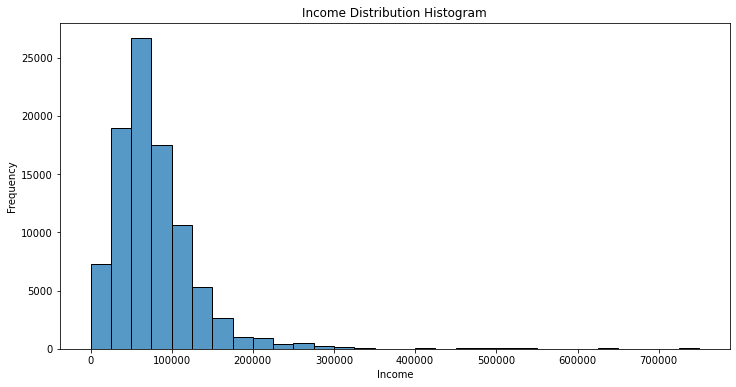

In [94]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df_1610['Income_adj'], bins=30, kde=False)
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


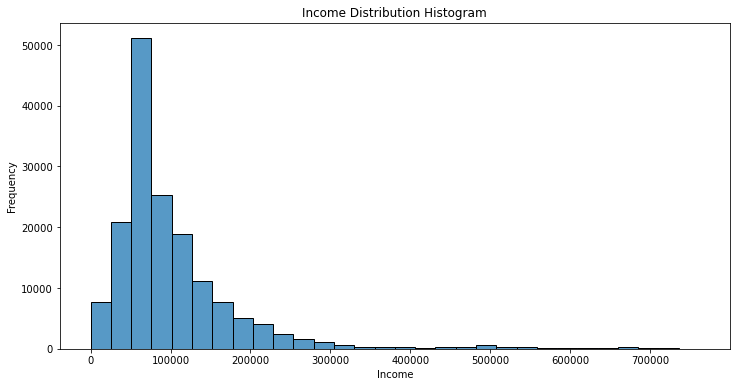

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df_1650['Income_adj'], bins=30, kde=False)
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

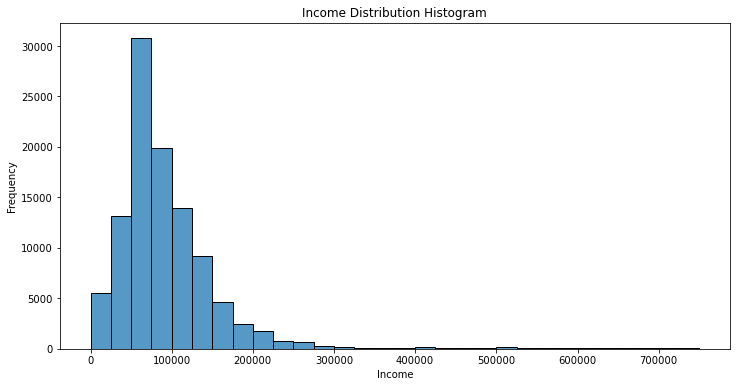

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df_1720['Income_adj'], bins=30, kde=False)
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

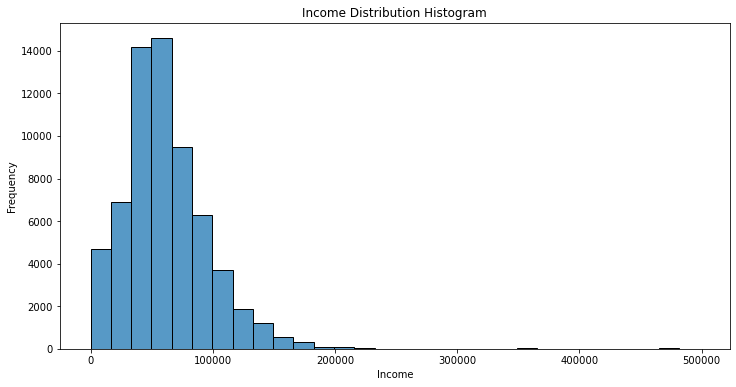

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df_1920['Income_adj'], bins=30, kde=False)
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

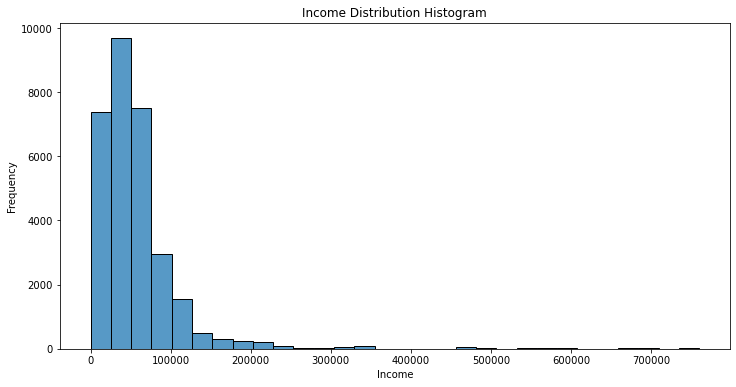

In [98]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df_1910['Income_adj'], bins=30, kde=False)
plt.title('Income Distribution Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()